<a href="https://colab.research.google.com/github/djdumpling/SBA-files/blob/main/SBA_diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import, basic definitions

In [ ]:
pip install matplotlib pymysql pandas SQLAlchemy brewer2mpl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pymysql
import pandas as pd
from pandas.tseries.offsets import DateOffset
from sqlalchemy import create_engine
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter
import textwrap
import numpy as np
import seaborn as sns

In [ ]:
db =  {
    "hostname":"sbaloandata.c1y4g4kqkbn1.us-east-1.rds.amazonaws.com",
    "port":3306,
    "username": "sbadev1",
    "password": "SbaDevATL1!",
    "database": "sbaloan"
    }

connection_string = f"mysql+pymysql://{db['username']}:{db['password']}@{db['hostname']}:{db['port']}/{db['database']}"
engine = create_engine(connection_string)

In [ ]:
def res_df_input(origination_date, origination_date_range, engine, MinGrossApproval = None, MaxGrossApproval = None, MinimumTermInMonths = None, NaicsCode = None, BorrState = None, BorrZip = None, BorrCity = None, BankName = None, ):
    origination_date = pd.to_datetime(origination_date)
    end_date = origination_date + DateOffset(months=origination_date_range) - DateOffset(days=1)

    start_date_str = origination_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    query = f"""
        SELECT *
        FROM sba_loan_7a
        WHERE ApprovalDate BETWEEN '{start_date_str}' AND '{end_date_str}'
    """

    conditions = []

    if MinGrossApproval is not None:
        conditions.append(f"GrossApproval >= {MinGrossApproval}")

    if MaxGrossApproval is not None:
        conditions.append(f"GrossApproval <= {MaxGrossApproval}")

    if MinimumTermInMonths is not None:
        conditions.append(f"TermInMonths >= '{MinimumTermInMonths}'")

    # to get the sector on the buisness
    # can change easily for the full NaicsCode
    if NaicsCode is not None:
        conditions.append(f"SUBSTRING(NaicsCode, 1, 2) = '{NaicsCode[:2]}'")

    if BorrState is not None:
        conditions.append(f"BorrState = '{BorrState}'")

    if BorrZip is not None:
        conditions.append(f"BorrZip = '{BorrZip}'")

    if BorrCity is not None:
        conditions.append(f"BorrCity = '{BorrCity}'")

    if BankName is not None:
        conditions.append(f"BankName = '{BankName}'")

    if conditions:
        query += " AND " + " AND ".join(conditions)

    query += " ORDER BY ApprovalDate"

    res_df = pd.read_sql_query(query, engine)

    return res_df

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# change the parameters accordingly
origination_date = '1990-10-01'
origination_date_range = 408   # range for the origination date
MinGrossApproval = None
MaxGrossApproval = None
MinimumTermInMonths = None   # minimum term of the loan
NaicsCode = None             #sector of NaicsCode (need string, not number)
BorrState = None
BorrZip = None
BorrCity = None
BankName = None

res_df = res_df_input(origination_date,
                      origination_date_range,
                      engine,
                      MinGrossApproval = MinGrossApproval,
                      MaxGrossApproval = MaxGrossApproval,
                      MinimumTermInMonths = MinimumTermInMonths,
                      NaicsCode = NaicsCode,
                      BorrState = BorrState,
                      BorrZip = BorrZip,
                      BorrCity = BorrCity,
                      BankName = BankName)
res_df

,LoanId,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,BankStreet,BankCity,BankState,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,DeliveryMethod,Subprogram,InitialInterestRate,FixedOrVariableInterestInd,TermInMonths,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectCounty,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,SoldSecMrktInd
0,f64a607c-180e-4cf0-8a67-32a42059ea06,7A,TECHNIGRAPHICS,1880 PARKWAY BLVD.,WEST VALLEY,UT,84119,BMO Bank National Association,16571.0,NaN,320 S Canal St,Chicago,IL,60606,839200.0,671360.0,1990-10-01,1991,1990-10-31,PLP,Guaranty,0.00,,120,323121,Tradebinding and Related Work,None,,SALT LAKE,UT,UTAH DISTRICT OFFICE,02,PARTNERSHIP,,PIF,2005-07-31,None,0.0,0,0,Y
1,f5033e4e-35e8-49ec-8d07-03462cd60bd4,7A,REHABILITATION ADVISORS INC,445 WYMORE ROAD STE 220,WINTER PARK,FL,32789,"TD Bank, National Association",18409.0,NaN,2035 Limestone Rd,WILMINGTON,DE,19808,200000.0,170000.0,1990-10-01,1991,1991-01-31,OTH 7A,Guaranty,0.00,,60,624310,Vocational Rehabilitation Services,None,,ORANGE,FL,NORTH FLORIDA DISTRICT OFFICE,07,CORPORATION,,PIF,2005-07-31,None,0.0,0,0,
2,dbc26869-0981-49be-bb74-7021877ed905,7A,GREEN VALLEY GROCERY/CRAWFORD,3915 W. TWAIN,LAS VEGAS,NV,89103,"Wells Fargo Bank, National Association",3511.0,NaN,101 N Philips Ave,SIOUX FALLS,SD,57104,345000.0,258750.0,1990-10-01,1991,1990-10-31,PLP,Guaranty,0.00,,246,,,None,,CLARK,NV,NEVADA DISTRICT OFFICE,01,CORPORATION,,PIF,2005-07-31,None,0.0,0,0,N
3,dac354b6-721f-4f81-a84f-7463afee284f,7A,FOUR SEASONS PLANT CTR. INC.,222 S. POPE ST.,BRECKENRIDGE,MN,56520,BMO Bank National Association,16571.0,NaN,320 S Canal St,Chicago,IL,60606,98900.0,89010.0,1990-10-01,1991,1990-10-31,OTH 7A,Guaranty,0.00,,11,,,None,,WILKIN,MN,MINNESOTA DISTRICT OFFICE,07,CORPORATION,,PIF,2005-07-31,None,0.0,0,0,
4,c7b5804d-05a6-4d79-80bf-9e6f5bedab28,7A,Michael Davis,P O BOX 1457,FOND DU LAC,WI,54936,"U.S. Bank, National Association",6548.0,NaN,425 Walnut St,CINCINNATI,OH,45202,250000.0,200000.0,1990-10-01,1991,1990-10-31,PLP,Guaranty,0.00,,48,,,None,,FOND DU LAC,WI,MILWAUKEE,06,CORPORATION,,PIF,2005-07-31,None,0.0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803628,a6f09f19-2311-4cd1-adb9-3d7d2e49d4af,7A,Saunders Construction LLC,18 UNION ST,READING,MA,01867,Rockland Trust Company,9712.0,NaN,288 Union St,ROCKLAND,MA,02370,75000.0,37500.0,2024-03-30,2024,None,SBA EXPRES,FA$TRK (Small Loan Express),9.50,V,120,238190,"Other Foundation, Structure, and Building Exte...",None,,MIDDLESEX,MA,MASSACHUSETTS DISTRICT OFFICE,06,CORPORATION,Existing or more than 2 years old,COMMIT,None,None,0.0,1,5,
1803629,a5e265c8-5d70-4588-ae25-1d061f156786,7A,OPEN RETAIL INC.,108 N ST ANDREWS PL,LOS ANGELES,CA,90004,BayFirst National Bank,34997.0,NaN,700 Central Avenue,Saint Petersburg,FL,33701,150000.0,127500.0,2024-03-30,2024,None,PLP,Guaranty,13.25,V,120,513210,Cable Networks,None,,LOS ANGELES,CA,LOS ANGELES DISTRICT OFFICE,28,CORPORATION,Existing or more than 2 years old,COMMIT,None,None,0.0,0,2,
1803630,b3c0fbe7-7d71-4b19-ae49-c2d83d4dee97,7A,MY DRYWALL LLC,9191 STATE ROUTE 305,GARRETTSVILLE,OH,44231,The Huntington National Bank,6560.0,NaN,17 S High St.,COLUMBUS,OH,43215,150000.0,75000.0,2024-03-30,2024,None,SBA EXPRES,FA$TRK (Small Loan Express),10.50,V,120,238310,Drywall and Insulation Contractors,None,,PORTAGE,OH,CLEVELAND DISTRICT OFFICE,13,CORPORATION,Existing or more than 2 years old,COMMIT,None,None,0.0,1,0,
1803631,b4640bb3-13c4-4f70-971a-195b2368dd4d,7A,Green Turf Owners Landscaping,418 STAHL AVE,NEW CASTLE,DE,19720,"TD Bank, National Association",18409.0,NaN,2035 Limestone Rd,WILMINGTON,DE,19808,25000.0,12500.0,2024-03-30,2024,None,SBA 

# Non-PD/LGD diagrams

<ipython-input-6-89cb82305def>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


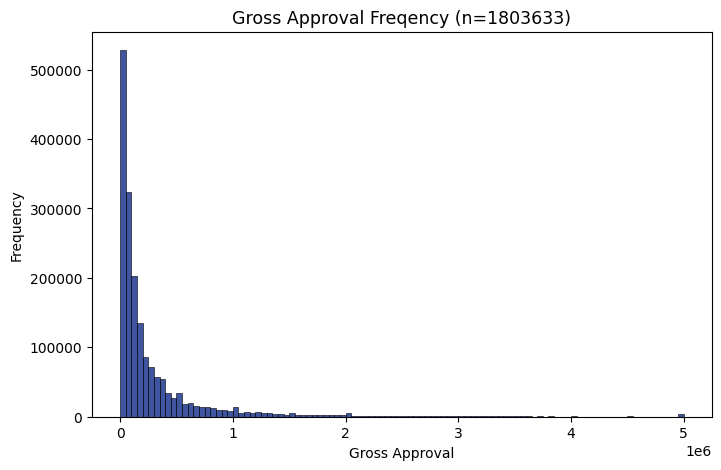

In [ ]:
plt.style.use('seaborn-dark-palette')

gross_approval = res_df['GrossApproval']
length = gross_approval.size

bin_size = 50000

max_value = gross_approval.max()
bins = np.arange(0, max_value+bin_size, bin_size)

plt.figure(figsize=(8,5))

sns.histplot(gross_approval, bins=bins, edgecolor='black')
plt.xlabel('Gross Approval')
plt.ylabel('Frequency')
plt.title(f'Gross Approval Freqency (n={length})', fontsize = 12.5)
plt.show()

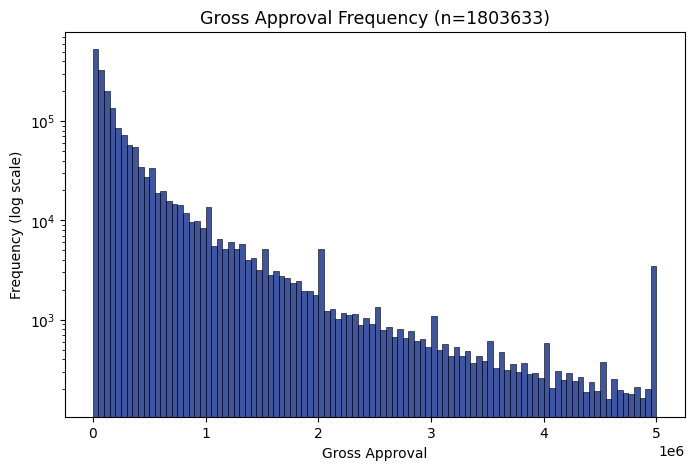

In [ ]:
gross_approval = res_df['GrossApproval']
length = gross_approval.size

bin_size = 50000

max_value = gross_approval.max()
bins = np.arange(0, max_value+bin_size, bin_size)

plt.figure(figsize=(8, 5))

sns.histplot(gross_approval, bins=bins, edgecolor='black', log = True)
plt.xlabel('Gross Approval')
plt.ylabel('Frequency (log scale)')
plt.title(f'Gross Approval Frequency (n={length})', fontsize = 12.5)
plt.show()

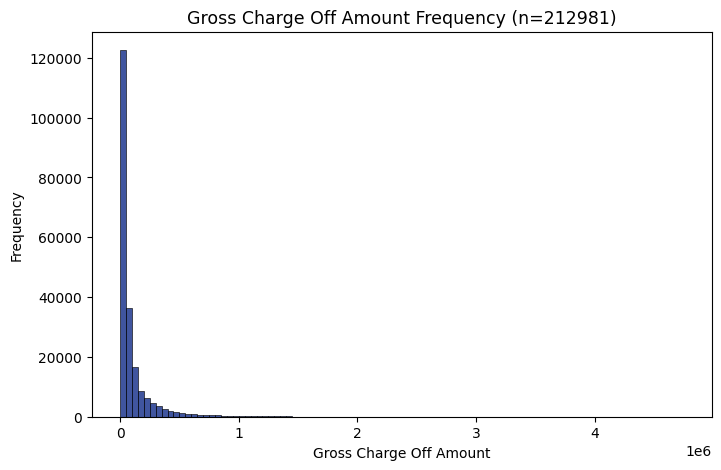

In [ ]:
res_df_defaulted = res_df[res_df['LoanStatus'] == 'CHGOFF']
gross_charge_off_amount = res_df_defaulted['GrossChargeOffAmount']
length = gross_charge_off_amount.size

bin_size = 50000

max_value = gross_charge_off_amount.max()
bins = np.arange(0, max_value+bin_size, bin_size)

plt.figure(figsize=(8,5))

sns.histplot(gross_charge_off_amount, bins=bins, edgecolor='black')
plt.xlabel('Gross Charge Off Amount')
plt.ylabel('Frequency')
plt.title(f'Gross Charge Off Amount Frequency (n={length})', fontsize = 12.5)
plt.show()

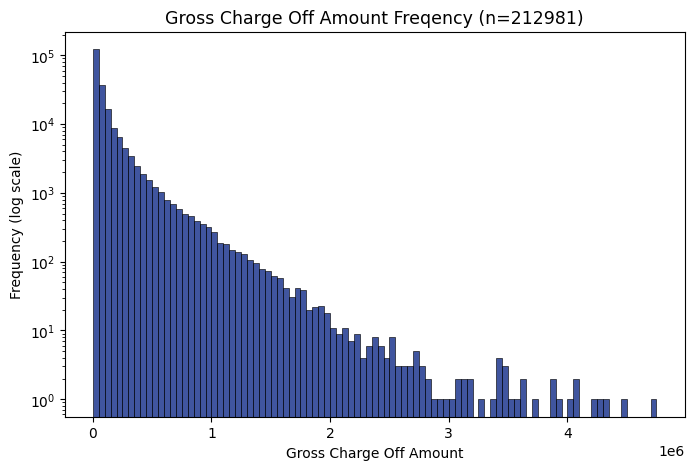

In [ ]:
res_df_defaulted = res_df[res_df['LoanStatus'] == 'CHGOFF']
gross_charge_off_amount = res_df_defaulted['GrossChargeOffAmount']
length = gross_charge_off_amount.size

bin_size = 50000

max_value = gross_charge_off_amount.max()
bins = np.arange(0, max_value+bin_size, bin_size)

plt.figure(figsize=(8,5))

sns.histplot(gross_charge_off_amount, bins=bins, edgecolor='black', log = True)
plt.xlabel('Gross Charge Off Amount')
plt.ylabel('Frequency (log scale)')
plt.title(f'Gross Charge Off Amount Freqency (n={length})', fontsize = 12.5)
plt.show()

In [ ]:
res_df['ApprovalDate'] = pd.to_datetime(res_df['ApprovalDate'])
res_df['Quarter'] = res_df['ApprovalDate'].dt.to_period('Q').astype(str)

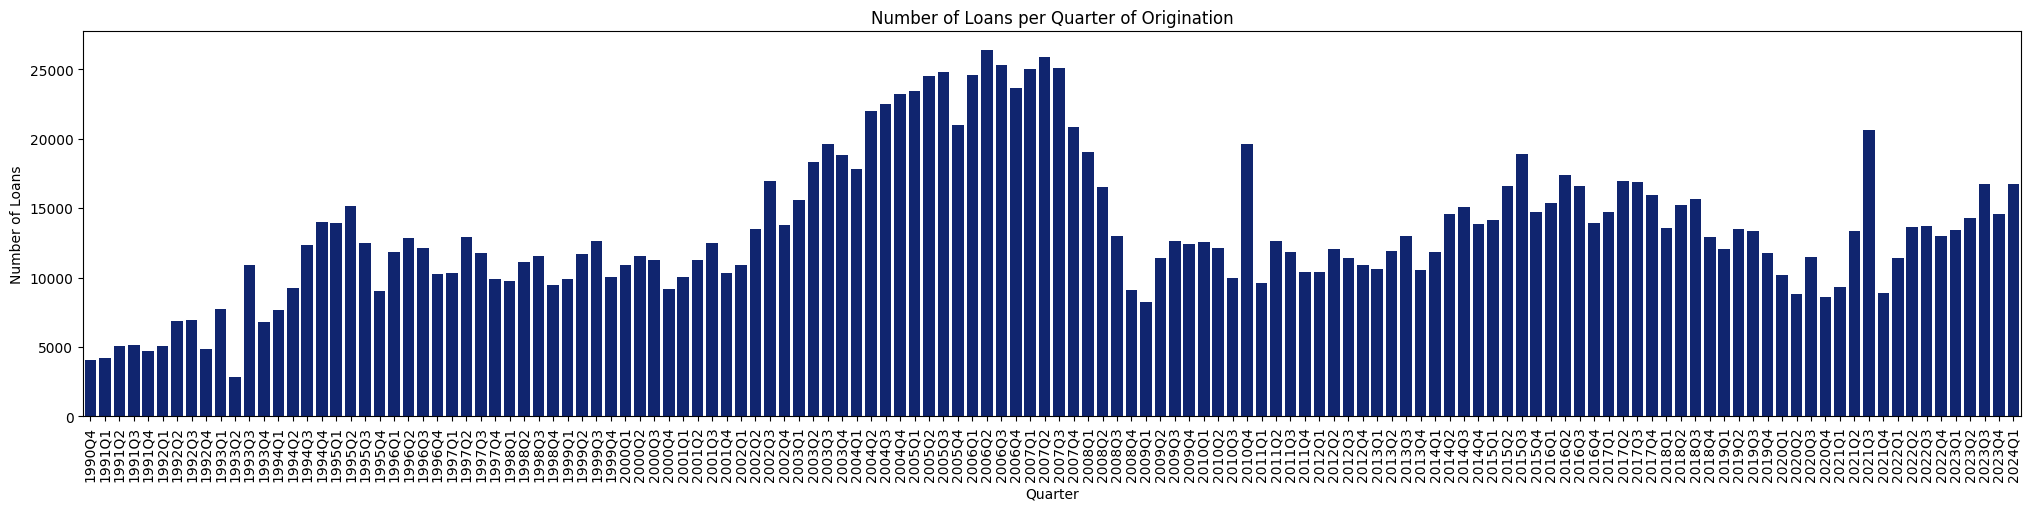

In [ ]:
quarterly_loans_count = res_df.groupby('Quarter').size().reset_index(name='LoanCount')
plt.figure(figsize=(25, 5))
sns.barplot(data=quarterly_loans_count, x='Quarter', y='LoanCount')
plt.xticks(rotation=90)
plt.xlabel('Quarter')
plt.ylabel('Number of Loans')
plt.title('Number of Loans per Quarter of Origination')
plt.show()

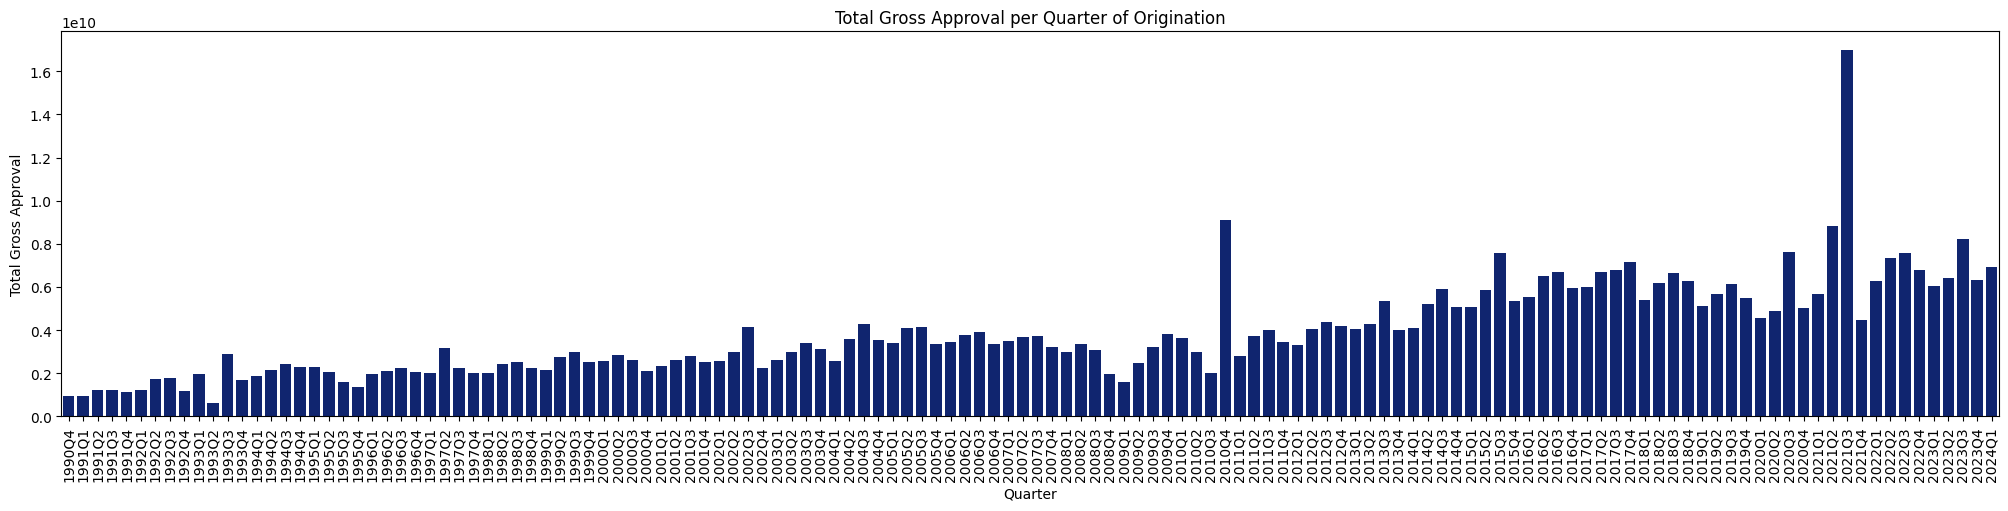

In [ ]:
quarterly_approval = res_df.groupby('Quarter')['GrossApproval'].sum().reset_index()
plt.figure(figsize=(25, 5))
sns.barplot(data=quarterly_approval, x='Quarter', y='GrossApproval')
plt.xticks(rotation=90)
plt.xlabel('Quarter')
plt.ylabel('Total Gross Approval')
plt.title('Total Gross Approval per Quarter of Origination')
plt.show()

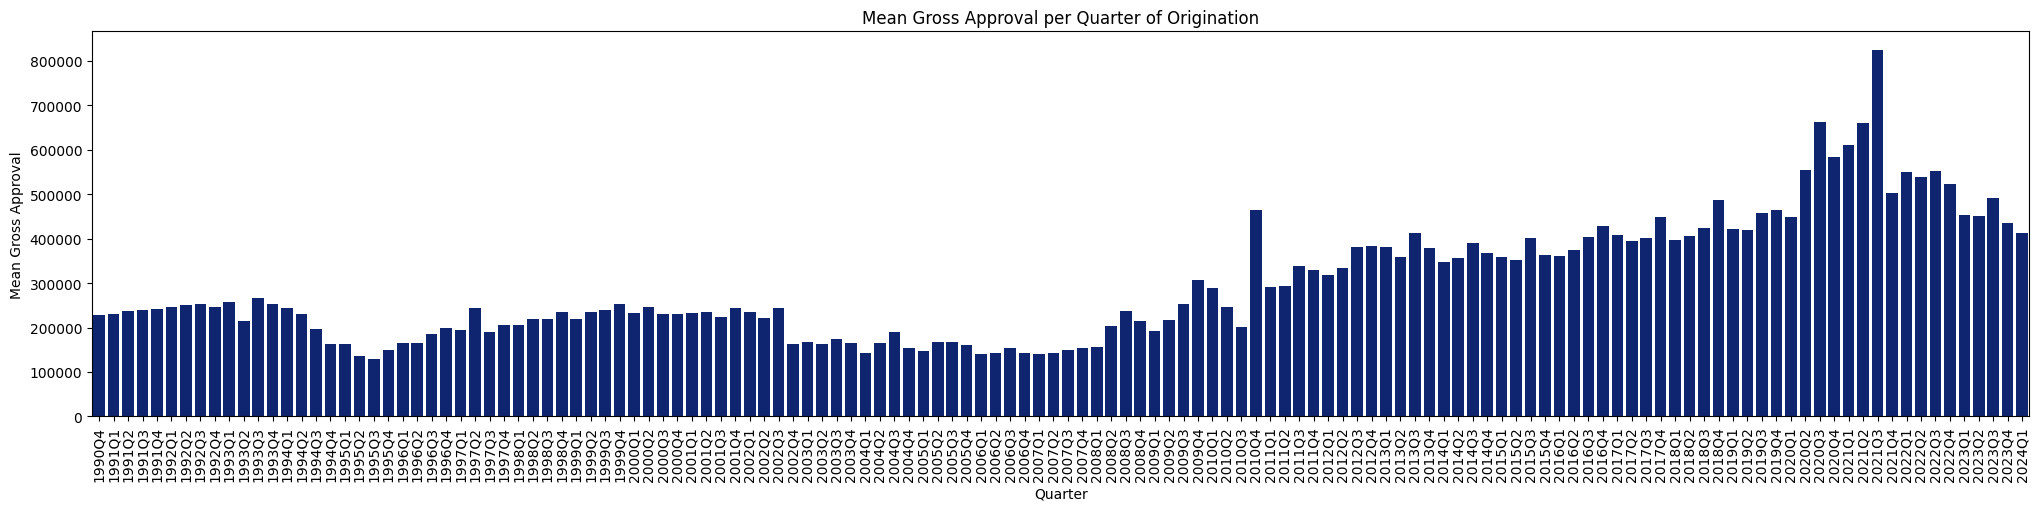

In [ ]:
quarterly_approval = res_df.groupby('Quarter')['GrossApproval'].mean().reset_index()
plt.figure(figsize=(25, 5))
sns.barplot(data=quarterly_approval, x='Quarter', y='GrossApproval')
plt.xticks(rotation=90)
plt.xlabel('Quarter')
plt.ylabel('Mean Gross Approval')
plt.title('Mean Gross Approval per Quarter of Origination')
plt.show()

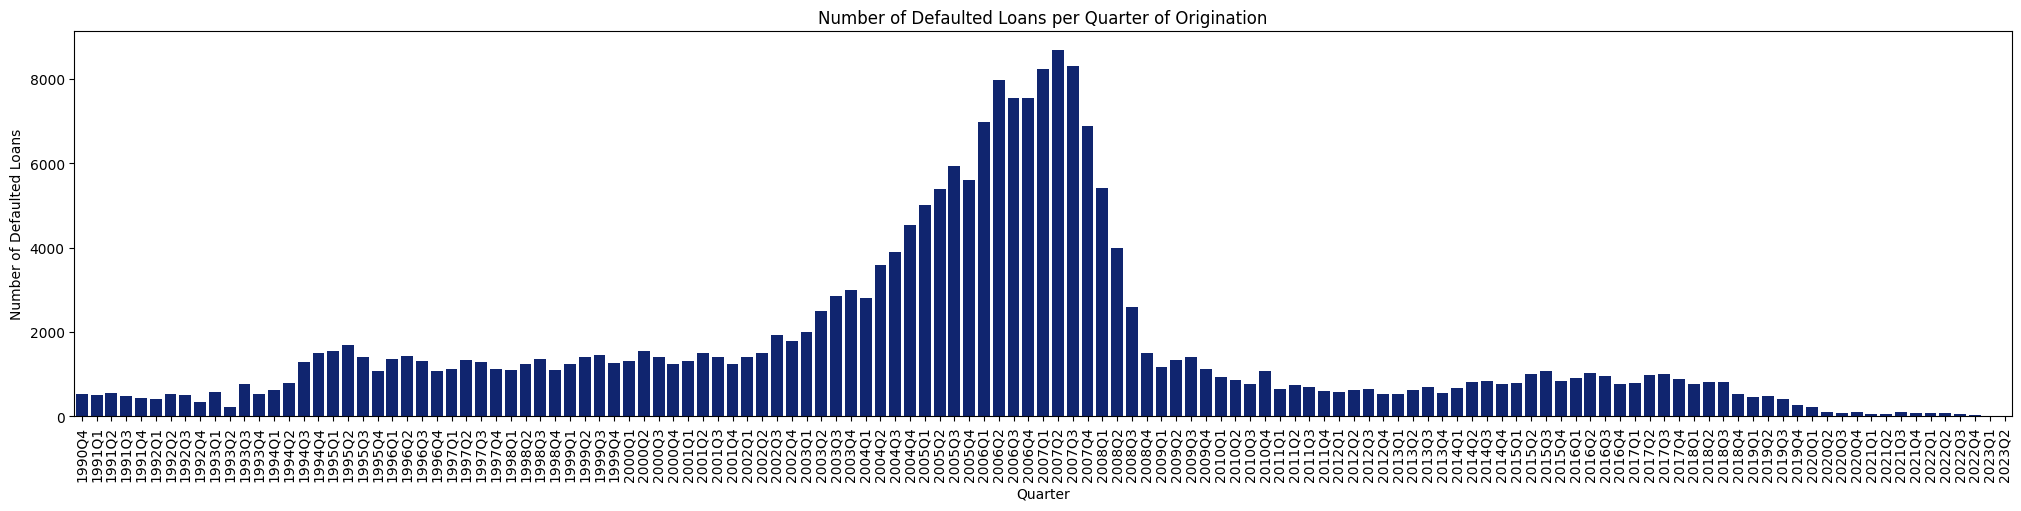

In [ ]:
res_df_defaulted = res_df[res_df['LoanStatus'] == 'CHGOFF']
gross_charge_off_amount = res_df_defaulted['GrossChargeOffAmount']

quarterly_loans_count = res_df_defaulted.groupby('Quarter').size().reset_index(name='LoanCount')
plt.figure(figsize=(25, 5))
sns.barplot(data=quarterly_loans_count, x='Quarter', y='LoanCount')
plt.xticks(rotation=90)
plt.xlabel('Quarter')
plt.ylabel('Number of Defaulted Loans')
plt.title('Number of Defaulted Loans per Quarter of Origination')
plt.show()

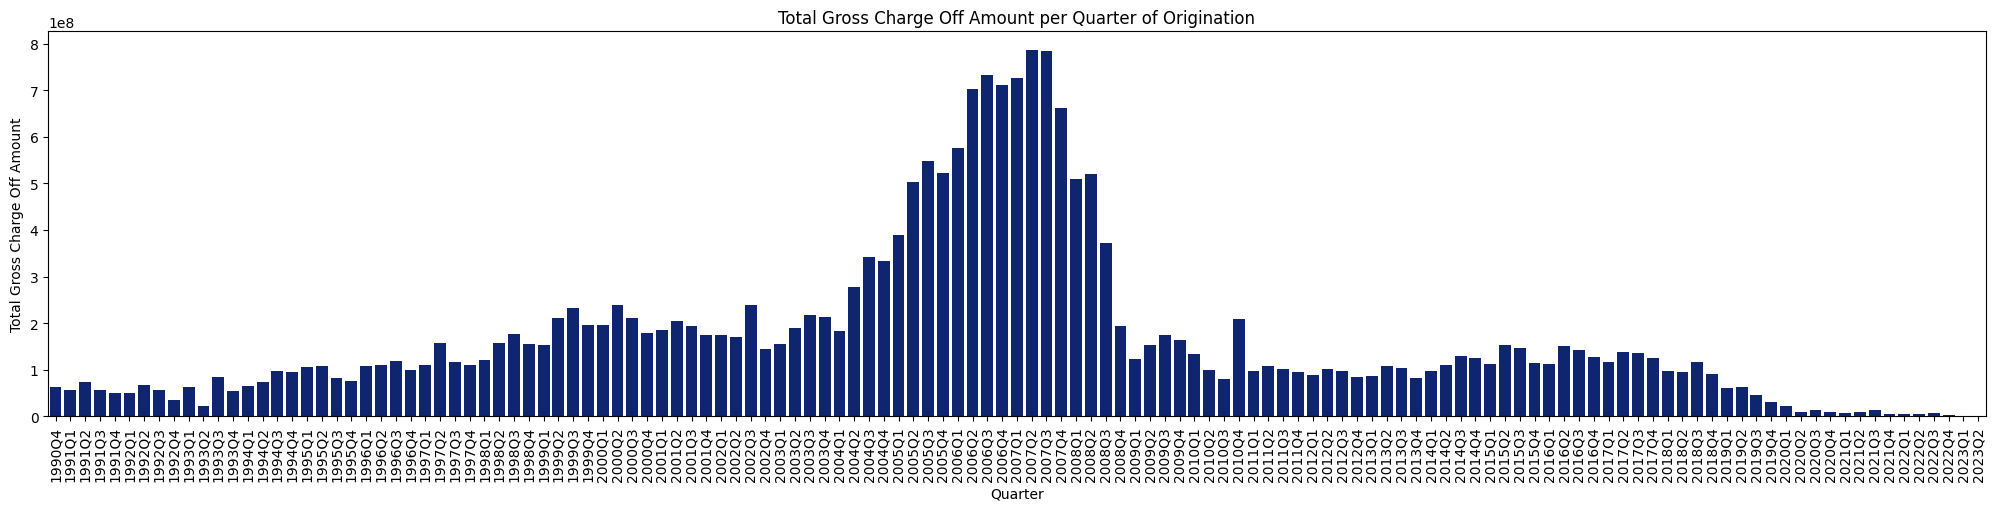

In [ ]:
quarterly_loans_count = res_df_defaulted.groupby('Quarter')['GrossChargeOffAmount'].sum().reset_index(name='LoanCount')
plt.figure(figsize=(25, 5))
sns.barplot(data=quarterly_loans_count, x='Quarter', y='LoanCount')
plt.xticks(rotation=90)
plt.xlabel('Quarter')
plt.ylabel('Total Gross Charge Off Amount')
plt.title('Total Gross Charge Off Amount per Quarter of Origination')
plt.show()

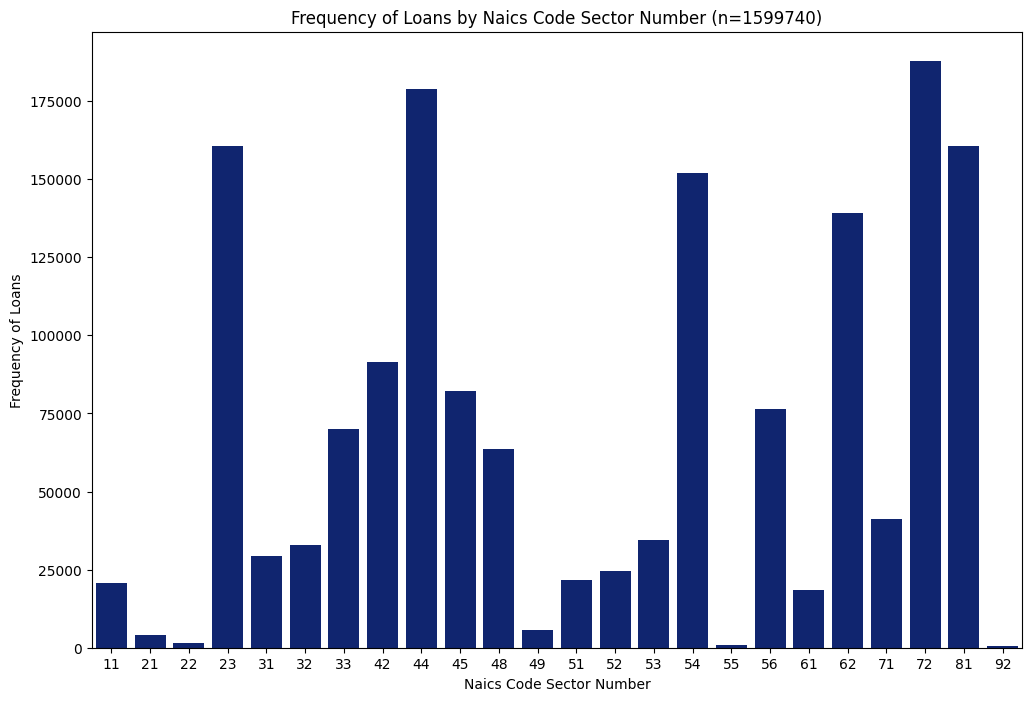

In [ ]:
res_df['Sector'] = res_df['NaicsCode'].str[:2]
res_df_NaicsCode = res_df[res_df['Sector'] != '']
length = len(res_df_NaicsCode)

sector_loan_count = res_df_NaicsCode['Sector'].value_counts().reset_index(name='LoanCount').rename(columns={'index': 'Sector'})

sector_loan_count['Sector'] = pd.to_numeric(sector_loan_count['Sector'], errors='coerce')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=sector_loan_count, x='Sector', y='LoanCount')
plt.xlabel('Naics Code Sector Number')
plt.ylabel('Frequency of Loans')
plt.title(f'Frequency of Loans by Naics Code Sector Number (n={length})')
plt.show()

<ipython-input-17-ee286e30a190>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df_without_empty_sector['Sector_numeric'] = pd.to_numeric(res_df_without_empty_sector['Sector'], errors='coerce')


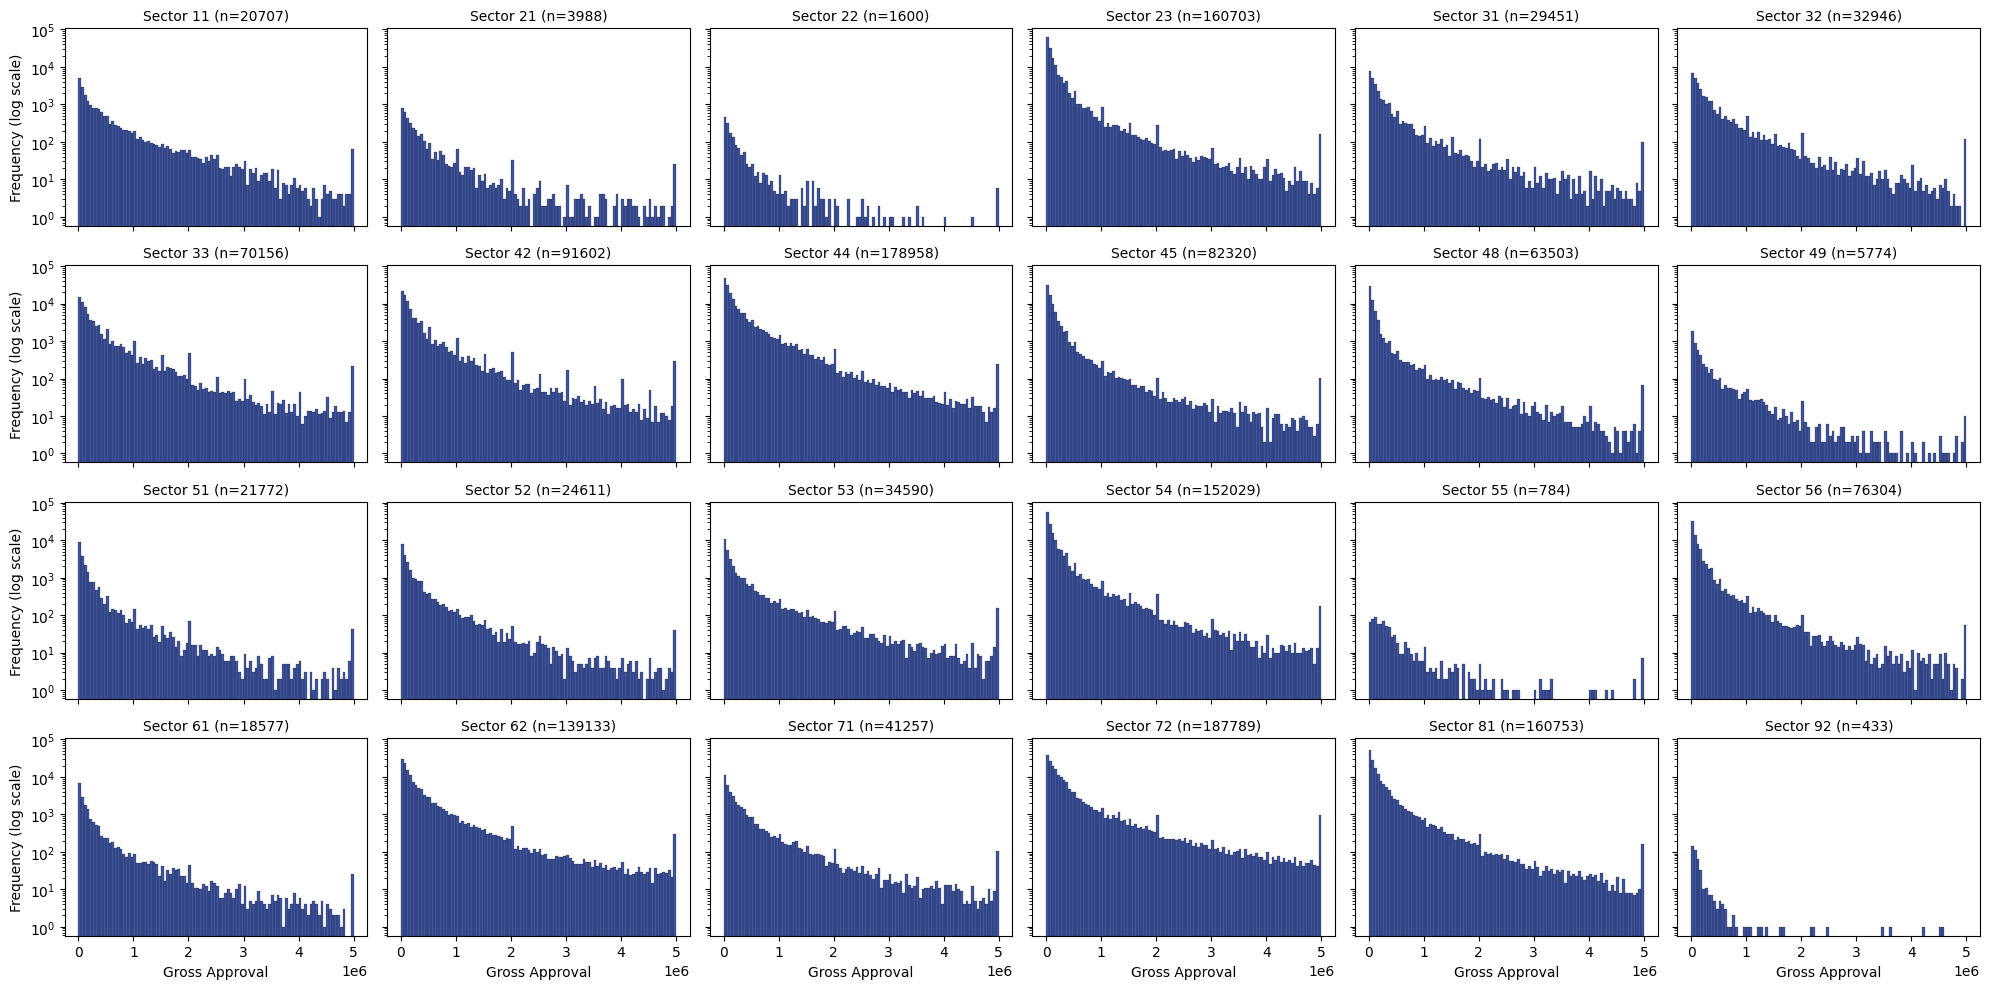

In [ ]:
res_df['Sector'] = res_df['NaicsCode'].str[:2]
res_df_without_empty_sector = res_df[res_df['Sector'] != '']

res_df_without_empty_sector['Sector_numeric'] = pd.to_numeric(res_df_without_empty_sector['Sector'], errors='coerce')

res_df_without_empty_sector = res_df_without_empty_sector.dropna(subset=['Sector_numeric'])

sorted_sectors = sorted(res_df_without_empty_sector['Sector_numeric'].unique())

nrows, ncols = 4, 6

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

if len(axes) < len(sorted_sectors):
    raise ValueError("Not enough subplots to accommodate all sectors")

for i, value in enumerate(sorted_sectors):
    res_df_sectored = res_df_without_empty_sector[res_df_without_empty_sector['Sector_numeric'] == value]
    gross_approval = res_df_sectored['GrossApproval']
    length = gross_approval.size

    bin_size = 50000
    max_value = gross_approval.max()
    bins = np.arange(0, max_value + bin_size, bin_size)

    sns.histplot(gross_approval, bins=bins, edgecolor='black', log=True, ax=axes[i])
    axes[i].set_xlabel('Gross Approval')
    axes[i].set_ylabel('Frequency (log scale)')
    axes[i].set_title(f'Sector {int(value)} (n={length})', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

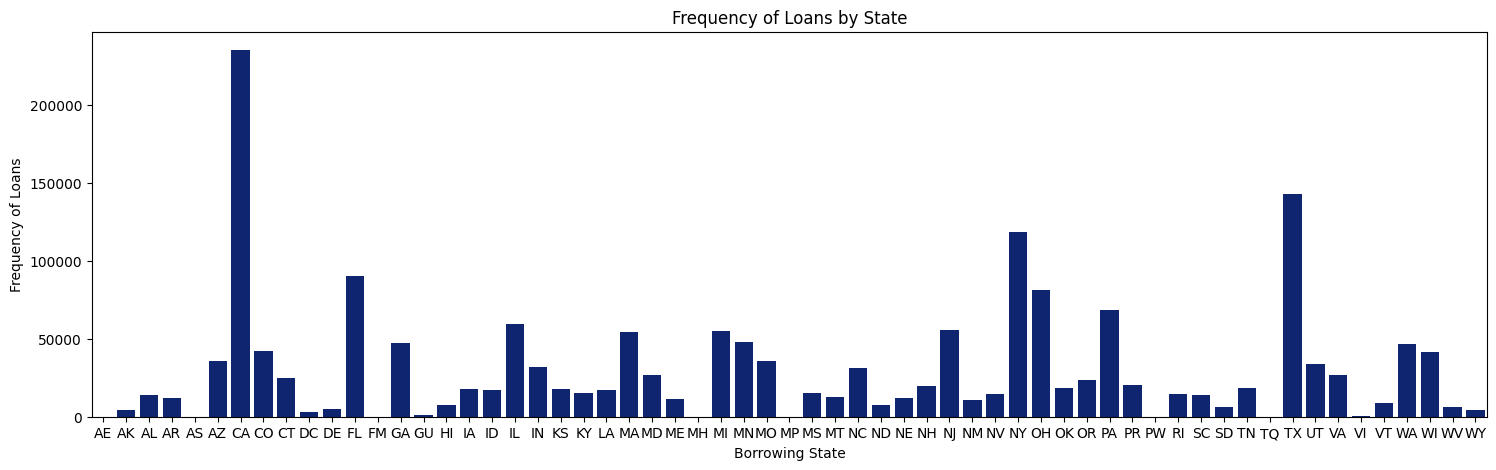

In [ ]:
res_df_state = res_df[res_df['BorrState'] != '']

state_loan_count = res_df_state['BorrState'].value_counts().reset_index(name='LoanCount')
state_loan_count.columns = ['State', 'LoanCount']

state_loan_count = state_loan_count.sort_values('State')

plt.figure(figsize=(18, 5))
sns.barplot(data=state_loan_count, x='State', y='LoanCount')
plt.xlabel('Borrowing State')
plt.ylabel('Frequency of Loans')
plt.title(f'Frequency of Loans by State')
plt.show()

720


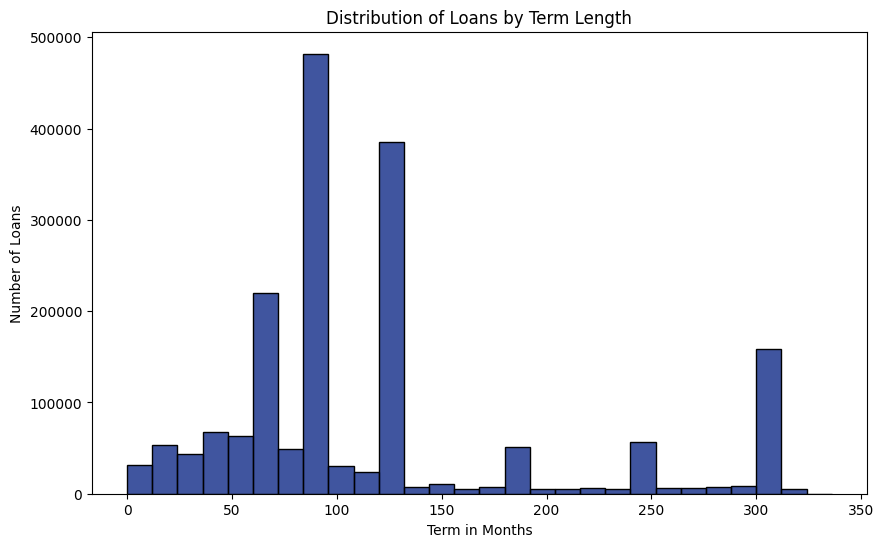

In [ ]:
res_df_term_in_months = res_df[res_df['TermInMonths'] != '']
res_df_term_in_months = res_df_term_in_months[res_df_term_in_months['TermInMonths'] != 847]
print(res_df_term_in_months['TermInMonths'].max())

plt.figure(figsize=(10, 6))
sns.histplot(res_df_term_in_months['TermInMonths'], bins=range(0, 340, 12))
plt.xlabel('Term in Months')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Term Length')
plt.show()

# More PD/LGD based

<ipython-input-31-54c0079a6648>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df_defaulted['ChargeOffDate'] = pd.to_datetime(res_df_defaulted['ChargeOffDate'])
<ipython-input-31-54c0079a6648>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df_defaulted['ApprovalDate'] = pd.to_datetime(res_df_defaulted['ApprovalDate'])
<ipython-input-31-54c0079a6648>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

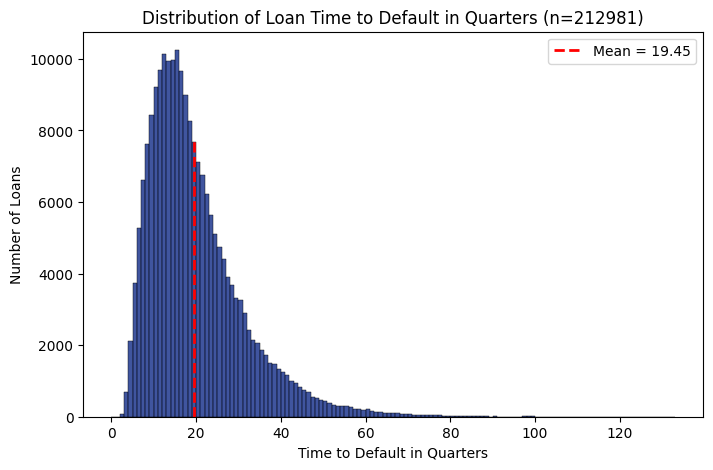

In [ ]:
res_df_defaulted['ChargeOffDate'] = pd.to_datetime(res_df_defaulted['ChargeOffDate'])
res_df_defaulted['ApprovalDate'] = pd.to_datetime(res_df_defaulted['ApprovalDate'])

res_df_defaulted['QuarterDiff'] = ((res_df_defaulted['ChargeOffDate'].dt.year - res_df_defaulted['ApprovalDate'].dt.year) * 4 +
                                   (res_df_defaulted['ChargeOffDate'].dt.quarter - res_df_defaulted['ApprovalDate'].dt.quarter))
length = res_df_defaulted['QuarterDiff'].size

plt.figure(figsize=(8, 5))
sns.histplot(res_df_defaulted['QuarterDiff'], bins=range(int(res_df_defaulted['QuarterDiff'].min()), int(res_df_defaulted['QuarterDiff'].max()) + 1))

mean_quarter_diff = res_df_defaulted['QuarterDiff'].mean()
height = 7800
plt.plot([mean_quarter_diff, mean_quarter_diff], [0, height], color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_quarter_diff:.2f}')

plt.xlabel('Time to Default in Quarters')
plt.ylabel('Number of Loans')
plt.legend()
plt.title(f'Distribution of Loan Time to Default in Quarters (n={length})')
plt.show()